<a href="https://colab.research.google.com/github/HuangEric22/CS35L-Save-My-Seat/blob/main/CleaningAndEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

Load Dataset

In [ ]:
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Inspect Dataset

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
df.sample(20)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
89247,89247,3ZPrcLz9peBVWyYZHwx0DI,Daddy Yankee,Feliz Cumpleaños con Perreo,Dura,3,200480,False,0.783,0.840,1,-3.416,1,0.0510,0.174000,0.000000,0.4120,0.8380,95.002,4,reggaeton
70858,70858,6oNcphQ4QKhOK6QYgDmoht,Jacky Cheung,真情流露-張學友,分手總要在雨天,52,287506,False,0.611,0.282,4,-13.691,1,0.0278,0.561000,0.000000,0.1200,0.2820,92.067,4,mandopop
63972,63972,0Gk4bu5hkPxgm0q6iqCXC6,SIX LOUNGE,THE BULB,ナイトタイマー,32,143786,False,0.347,0.948,4,-0.856,1,0.0585,0.000137,0.000000,0.3420,0.7300,178.324,4,j-rock
70,70,16dkWKIlBsfYTISCVuDs0w,Ron Pope,Whatever It Takes,A Drop In the Ocean,55,219480,False,0.484,0.573,5,-6.183,1,0.0298,0.088200,0.000001,0.1500,0.3460,139.966,3,acoustic
7656,7656,0RL85lThYJR9XA0fiVIly7,Wood Belly,Solid Ground,Wings,22,234706,False,0.606,0.691,2,-8.827,1,0.0291,0.319000,0.041800,0.2700,0.6590,131.035,4,bluegrass
41510,41510,3upy9qZlOMB9jGqLkhtWCf,The Coffinshakers,The Coffinshakers,Curse of the Mummy's Tomb,25,112680,True,0.487,0.935,9,-4.819,1,0.3530,0.017700,0.000000,0.2200,0.5650,144.632,4,goth
111875,111875,2i738T8NlMAgaqS5GD4bOY,Federico Aubele,The Holographic Moon,All Things Pass,18,165405,False,0.589,0.625,5,-8.870,0,0.0397,0.647000,0.096600,0.1560,0.3910,148.010,4,trip-hop
51257,51257,2r32XiAWtZbT3eLUvf4pag,Vishal Dadlani,Talaash,Jee Le Zaraa,65,215202,False,0.584,0.698,4,-6.610,0,0.0376,0.447000,0.000000,0.0699,0.4360,79.993,4,hip-hop
66894,66894,3MA4cnvyVK9uYO2PM8tYPj,Mini Pop Kids,Mini Pop Kids 17,Don't Call Me Angel,8,188973,False,0.777,0.685,0,-5.709,0,0.0410,0.008080,0.000005,0.1290,0.1920,102.996,4,kids
6823,6823,3g3SS71pr4Js0T6XhLdxoX,Deströyer 666,Wildfire,Tamam Shud,16,418698,False,0.211,0.965,8,-4.571,0,0.1100,0.006060,0.381000,0.0923,0.0518,119.866,4,black-metal


In [ ]:
df.shape

(114000, 21)

In [ ]:
df.select_dtypes('number').describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
#check if there are any missing values in dataset
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [ ]:
#since such a small percentage of the data is missing, we can remove the data with missing values
df_cleaned = df.dropna()

In [ ]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Dataset is now cleaned properly.

Our group was curious about the factors that affect a song's popularity (i.e. duration, danceability, etc. of a song).



In [ ]:
print(df_cleaned.dtypes)

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [29]:
#Perform correlation calculations

numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64', 'bool']).columns
exclude_columns = ['Unnamed: 0', 'popularity']
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

correlation_results = {}

for col in numerical_columns:
    correlation = df_cleaned['popularity'].corr(df_cleaned[col])
    correlation_results[col] = correlation

correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation'])

correlation_df

,Correlation
duration_ms,-0.007129
explicit,0.044078
danceability,0.035444
energy,0.001053
key,-0.003847
loudness,0.050420
mode,-0.013948
speechiness,-0.044930
acousticness,-0.025458
instrumentalness,-0.095147


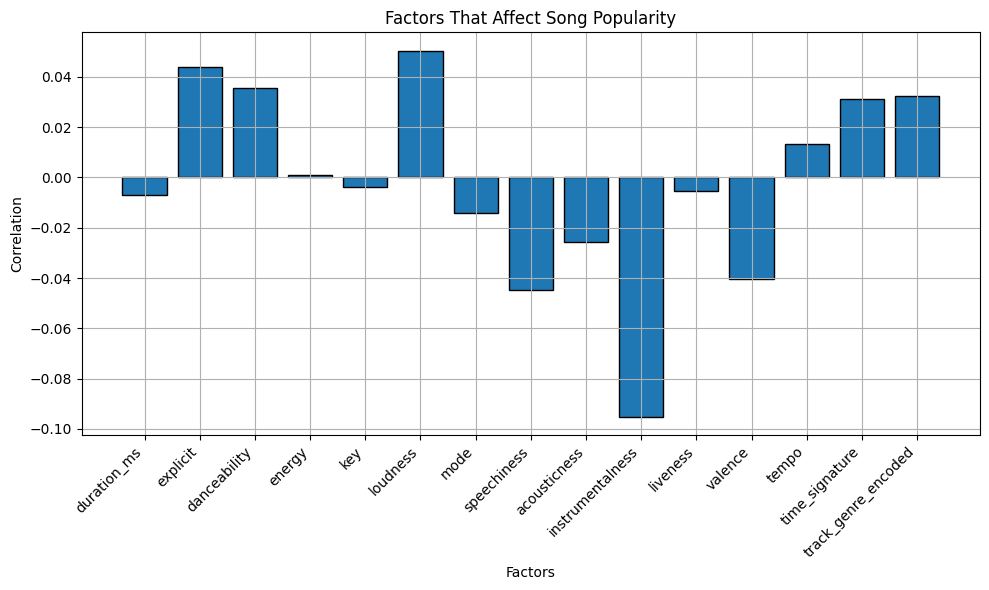

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(correlation_df.index, correlation_df['Correlation'], edgecolor='black')
plt.title('Factors That Affect Song Popularity')
plt.xlabel('Factors')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()